# ML2 k-NN, Linear Regression and Breast cancer

The following Model will do it's best at determining the malignance of a breast tumor by getting trained on the dataset provided by `scikit`! 

In [4]:
# import our training dataset and the splitter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# setting up our lists for comparing test results for n neighbors
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

# defining a loop for training through all ranges of n neighbors
for n_neighbors in neighbors_settings:
# build the model
    # for every loop n_neighbors gets raised by one
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    # train the model
    clf.fit(X_train, y_train)
    # record training set accuracy and put the values into our list
    training_accuracy.append(clf.score(X_train, y_train))
    # same here but for the test accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    

In [5]:
training_accuracy

[1.0,
 0.9765258215962441,
 0.9577464788732394,
 0.9553990610328639,
 0.9483568075117371,
 0.9460093896713615,
 0.9436619718309859,
 0.9413145539906104,
 0.9342723004694836,
 0.9389671361502347]

In [6]:
test_accuracy

[0.9020979020979021,
 0.8881118881118881,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9370629370629371,
 0.9300699300699301,
 0.9300699300699301,
 0.916083916083916,
 0.916083916083916]

Let's plot the results and see for how many neighbors our model is the most effective!📊

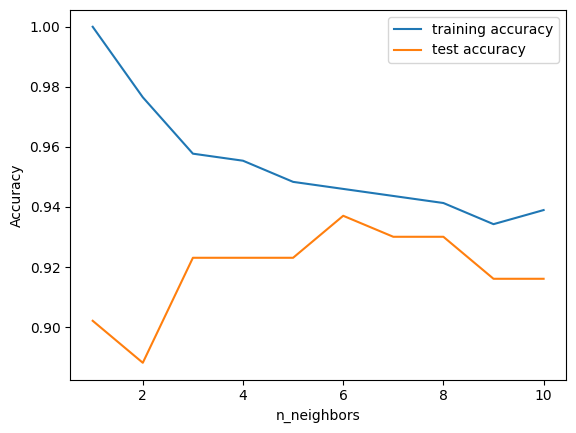

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# x -> nr of neighbors, y -> Test/Train Accuracy
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

We see, that the sweetspot for n lies at 6 neighbors!

In [16]:
print('Highest Test Accuracy:' + ' ' + str(round(test_accuracy[5]*100, 2)) + '%')

Highest Test Accuracy: 93.71%


Let's look at regression now!

In [23]:
# Creating a pseudorandom wave dataset of 40 samples
import mglearn
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the set, rs=0 ensures same randomized results if we rerun(good for debugging)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# set up the regression model with 3 neighbors
reg_model = KNeighborsRegressor(n_neighbors=3)

#train the model
reg_model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [25]:
reg_model.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

We can evaluate the regression model by using the score function, it will return the R<sup>2</sup>- value.

In [30]:
print('R^2 Score:' + str(round(reg_model.score(X_test, y_test), 2)))

R^2 Score:0.83


0.83 is considered an okay-ish model fit, since our Dataset was relatively small!

Let's now plot the predictions and results considering the number of neighbors and draw conclusions.

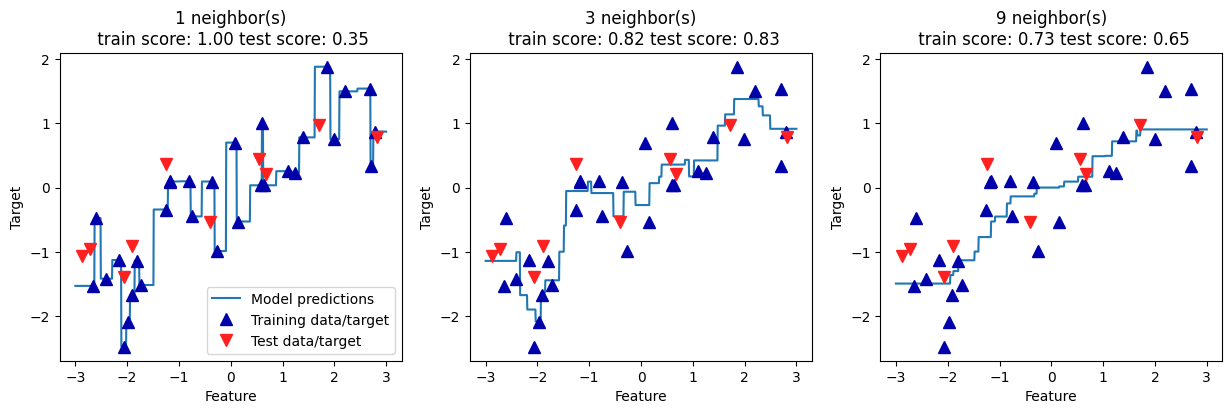

In [33]:
import numpy as np
# create 3 subplots for n = 1, 3 and 9
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1,000 data points, evenly spaced between -3 and 3
# reshape creates a 2d array with one null dimension out of the 2d linspace
line = np.linspace(-3, 3, 1000).reshape(-1, 1) 
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
      "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
    "Test data/target"], loc="best")

## Learning and Conclusions of using k-NN

#### Pro's
***
* ✔️ **easy** to understand model
* ✔️ **performs** reasonably well
* ✔️ helps building a solid **foundation**
***
#### Con's
***
* ❌ large trainingsets -> **slow** predictions
* ❌ datasets with many features need to be preprocessed for the model to do okay -> **takes time**
* ❌ doesn't performon `sparse-datasets` (most values are 0)